# Customer Predictive Analytics

In [1]:
# Resources:
# https://www.linkedin.com/feed/update/urn:li:ugcPost:6543417693700218880/

In [2]:
# https://www.scnsoft.com/blog/4-types-of-data-analytics
# Differeny Type of Analytics:
# 1. Descriptive Analytics: Answers what happened. Ex: Average weekly sales 
# 2. Diagnostive Analytics: Answers why it happened. Ex: Why the taret did not meet the expectations
# 3. Predictive Analytics: Answers what is likely to happen. Ex: Sales prediction
# 4. Prescriptive Analytics: Answers what action to take to eliminate a future problem Ex: Product pricing adjustments

In [3]:
# Customer Predictive Analytics:
# Recommend the best channels for contact

### Offer chat based on visitor propensity

In [4]:
#Importing all required packages:

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [5]:
#Importing browsing dataset for user buying behaviour:

prospect_data = pd.read_csv(r"Datasets/browsing.csv")

In [6]:
prospect_data.dtypes

SESSION_ID         int64
IMAGES             int64
REVIEWS            int64
FAQ                int64
SPECS              int64
SHIPPING           int64
BOUGHT_TOGETHER    int64
COMPARE_SIMILAR    int64
VIEW_SIMILAR       int64
WARRANTY           int64
SPONSORED_LINKS    int64
BUY                int64
dtype: object

In [7]:
prospect_data.head()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


In [8]:
prospect_data.shape

(500, 12)

In [9]:
prospect_data.columns

Index(['SESSION_ID', 'IMAGES', 'REVIEWS', 'FAQ', 'SPECS', 'SHIPPING',
       'BOUGHT_TOGETHER', 'COMPARE_SIMILAR', 'VIEW_SIMILAR', 'WARRANTY',
       'SPONSORED_LINKS', 'BUY'],
      dtype='object')

In [10]:
# The data contains information about the various links on the website that are clicked by the user during his browsing. 
# This is past data that will be used to build the model.

In [11]:
# Session ID : A unique identifier for the web browsing session
# Buy : Whether the prospect ended up buying the product
# Other columns : a 0 or 1 indicator to show whether the prospect visited that particular page or did the activity mentioned.

In [12]:
# Dataset Summary Statistics:
prospect_data.describe()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,0.510000,0.5200,0.440000,0.4800,0.528000,0.500000,0.580000,0.468000,0.532000,0.550000,0.370000
std,144.481833,0.500401,0.5001,0.496884,0.5001,0.499715,0.500501,0.494053,0.499475,0.499475,0.497992,0.483288
min,1001.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.500000,1.000000,1.0000,0.000000,0.0000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1375.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1500.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Output attribute : Buy
# Input attributes: SESSION_ID, IMAGES, REVIEWS, FAQ, SPECS, SHIPPING,BOUGHT_TOGETHER, COMPARE_SIMILAR, 
#                  VIEW_SIMILAR, WARRANTY,SPONSORED_LINKS

### Correlation Analysis:

In [14]:
prospect_data.corr()['BUY'].abs().sort_values(ascending=False)

BUY                1.000000
REVIEWS            0.404628
COMPARE_SIMILAR    0.190522
WARRANTY           0.179156
SPONSORED_LINKS    0.110328
BOUGHT_TOGETHER    0.103562
VIEW_SIMILAR       0.096137
FAQ                0.095136
IMAGES             0.046819
SESSION_ID         0.026677
SHIPPING           0.022239
SPECS              0.009950
Name: BUY, dtype: float64

In [15]:
# Session_ID is irrelavant for the analysis as it just an ID, so we can ignore it
# BUY is the output variable so we need to focus on other variables

In [16]:
# From the correlation matrix to the output variable, we can take most relavant input features on which output is depend

In [17]:
# So we will consider REVIEWS, COMPARE_SIMILAR, WARRANTY, SPONSORED_LINKS, BOUGHT_TOGETHER features 
# for further analysis and hence dropping other columns

In [18]:
prospect_data.loc[prospect_data['BUY']==0].count()

SESSION_ID         315
IMAGES             315
REVIEWS            315
FAQ                315
SPECS              315
SHIPPING           315
BOUGHT_TOGETHER    315
COMPARE_SIMILAR    315
VIEW_SIMILAR       315
WARRANTY           315
SPONSORED_LINKS    315
BUY                315
dtype: int64

In [19]:
prospect_data.groupby('BUY')['SESSION_ID'].count()

BUY
0    315
1    185
Name: SESSION_ID, dtype: int64

In [20]:
predictors = prospect_data[['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS']]

In [21]:
targets = prospect_data['BUY']

### Training and Testing Split

In [22]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2,stratify = targets)

In [23]:
tar_train.groupby(tar_train).count()

BUY
0    252
1    148
Name: BUY, dtype: int64

In [24]:
tar_test.groupby(tar_test).count()

BUY
0    63
1    37
Name: BUY, dtype: int64

### Build Model and Check Accuracy

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
classifier=GaussianNB()

classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

In [27]:
#Analyze accuracy of predictions

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[43, 20],
       [15, 22]], dtype=int64)

In [28]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.65

In [29]:
pred_prob=classifier.predict_proba(pred_test)

In [30]:
pred_prob[0,1]

0.2335890142932877

In [31]:
browsing_data = np.array([0,0,0,0,0]).reshape(1, -1)

In [32]:
print("New visitor: propensity :",classifier.predict_proba(browsing_data)[:,1])

New visitor: propensity : [0.04848897]


In [33]:
#Now, suppose the customer does a comparison of similar products.

browsing_data = np.array([0,0,1,0,0]).reshape(1, -1)

print("After checking similar products: propensity :",classifier.predict_proba(browsing_data)[:,1])

After checking similar products: propensity : [0.10074591]


In [34]:
#It goes up. Next, he checks out reviews.

browsing_data = np.array([1,0,1,0,0]).reshape(1, -1)

print("After checking reviews: propensity :",classifier.predict_proba(browsing_data)[:,1])

After checking reviews: propensity : [0.55704542]


# Use case Predict CLV

In [35]:
# What is Customer Lifetime Value?
# CLV is a prediction of the net profit attributed to the entire future relationship with a customer - Wikipedia

In [36]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [37]:
raw_data = pd.read_csv(r"Datasets/history.csv")

In [38]:
raw_data.columns

Index(['CUST_ID', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5',
       'MONTH_6', 'CLV'],
      dtype='object')

In [39]:
raw_data.dtypes

CUST_ID    int64
MONTH_1    int64
MONTH_2    int64
MONTH_3    int64
MONTH_4    int64
MONTH_5    int64
MONTH_6    int64
CLV        int64
dtype: object

In [40]:
raw_data.head()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


In [41]:
raw_data.shape

(100, 8)

### Correlation Analysis

In [42]:
cleaned_data = raw_data.drop("CUST_ID",axis=1)

cleaned_data .corr()['CLV'].abs().sort_values(ascending=False)

CLV        1.000000
MONTH_1    0.734122
MONTH_5    0.376775
MONTH_3    0.371742
MONTH_6    0.327064
MONTH_4    0.297408
MONTH_2    0.250397
Name: CLV, dtype: float64

In [43]:
predictors = cleaned_data.drop('CLV',axis=1)

targets = cleaned_data['CLV']

In [44]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.1)

In [45]:
print( "Predictor — Training : ", pred_train.shape, "Predictor — Testing : ", pred_test.shape)

Predictor — Training :  (90, 6) Predictor — Testing :  (10, 6)


In [46]:
#Build model on training data

model = LinearRegression()

model.fit(pred_train,tar_train)

print("Coefficients: ", model.coef_,"\n")

print("Intercept: ", model.intercept_)

Coefficients:  [34.91871382 10.70149638 15.74710685 11.1023922   8.37845757  5.56599841] 

Intercept:  -115.2348453585837


In [47]:
#Test on testing data

predictions = model.predict(pred_test)

In [48]:
predictions

array([10719.35096909,  6968.93258206,  8818.70649245, 11069.17756511,
       10490.32339504,  9105.52173582,  7089.8523009 ,  8537.01516799,
        8235.88557617,  7711.24566368])

In [49]:
sklearn.metrics.r2_score(tar_test, predictions)

0.6398692951653501

In [50]:
new_data = np.array([100,0,50,0,0,0]).reshape(1, -1)

new_pred=model.predict(new_data)

print("The CLV for the new customer is : $"+str(new_pred[0]))

The CLV for the new customer is : $4163.991879124512


# Use case Group problem types

In [51]:
%matplotlib inline
 
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

In [52]:
#Importing dataset:
raw_data = pd.read_csv(r"Datasets/issues.csv")

In [53]:
raw_data.columns

Index(['PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE'],
      dtype='object')

In [54]:
raw_data.dtypes

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object

In [55]:
raw_data.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


In [56]:
clust_data = raw_data.drop("PROBLEM_TYPE",axis=1)

In [57]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist

In [58]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

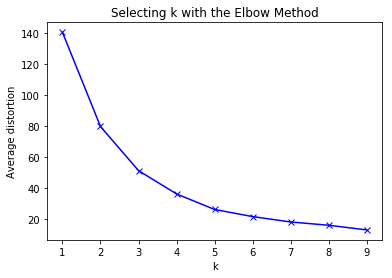

In [59]:
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [60]:
# Looking at the plot, we see that the knee happens at cluster=3.

# That is the ideal number of clusters. We now perform the actual clustering for 3.

In [61]:
#Optimal clusters is 3
final_model=KMeans(3)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)

In [62]:
#Join predicted clusters back to raw data
raw_data["GROUP"] = prediction
raw_data.sort_values('GROUP')[['GROUP','PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE']]

,GROUP,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
19,0,anti-virus not working,170,1.3,32,0.04,0.00
3,0,Slow system,165,1.2,32,0.03,0.00
15,0,WIFI not functioning,290,1.1,11,0.22,0.00
13,0,DVD read error,140,1.7,23,0.05,0.04
7,0,Too many popups in Browser,230,1.3,23,0.02,0.00
8,0,Cannot find printer,193,1.2,33,0.03,0.00
17,1,Laptop loses charge very fast,43,2.1,56,0.31,0.28
16,1,Laptop not charging,29,2.2,45,0.35,0.22
14,1,Cannot recover using restore,72,2.3,125,0.02,0.00
0,1,Admin Password Lost,45,2.3,54,0.15,0.00


# Analyse the groups

In [63]:
import seaborn as sns

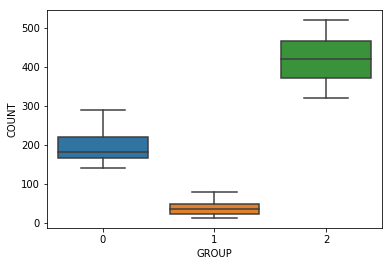

In [64]:
ax = sns.boxplot(x="GROUP", y="COUNT", data=raw_data)

In [65]:
#We can see that the count of incidents range differently for different groups.

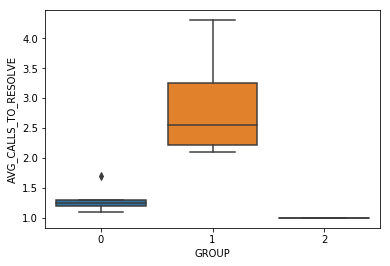

In [66]:
ax = sns.boxplot(x="GROUP", y="AVG_CALLS_TO_RESOLVE", data=raw_data)

In [67]:
#Group 1 has hardly any time needed to resolve. 
#This points to problems that are simple and straightforward. 
#The business needs to look at these incidents and provide a self-service path (product help, online help) 
#for the customer instead of wasting agent’s time

In [68]:
#Next, we see Reoccurance Rate.

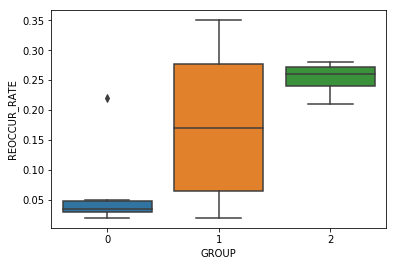

In [69]:
ax = sns.boxplot(x="GROUP", y="REOCCUR_RATE", data=raw_data)

In [70]:
#Group 1 has really high reoccurrence rate. 
#This set of incidents need to be analysed to see how the product quality can be improved to prevent these from happening

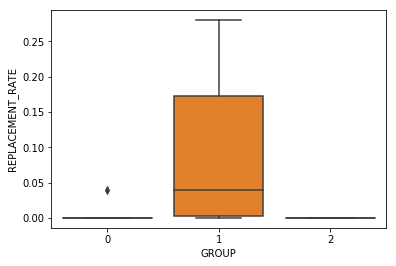

In [71]:
ax = sns.boxplot(x="GROUP", y="REPLACEMENT_RATE", data=raw_data)

In [72]:
#Replacement rates vary widely for Group 0. It does not provide any significant pattern to act upon.

In [73]:
#Group 2 has no replacement at all, which is good. 
#As we can see there group level tendencies that are showing now and based on this 
#then we can make some decisions at group level like for example, group 2 calls a lot of times, 
#hardly take any time to resolve, so maybe we can use some self-help. Group 1, on the other hand, 
#occurs a few times, takes a lot of time resolve, higher replacement, and reoccurrence rate. 
#Maybe we need to look at the product to make sure there’s nothing wrong with 
#the product or fix something in the product to see how this cannot happen again.

# How to implement Product Recommendation

In [74]:
import pandas as pd

In [75]:
userItemData = pd.read_csv(r'Datasets/ratings.csv')
userItemData.head()

,userId,ItemId
0,1001,5001
1,1001,5002
2,1001,5005
3,1002,5003
4,1002,5004


In [76]:
#Get list of unique items
itemList=list(set(userItemData["ItemId"].tolist()))
itemList

[5001, 5002, 5003, 5004, 5005]

In [77]:
#Get count of users
userCount=len(set(userItemData["userId"].tolist()))
userCount

5

In [78]:
#Create an empty data frame to store item affinity scores for items.
itemAffinity= pd.DataFrame(columns=('item1', 'item2', 'score'))
rowCount=0

In [79]:
#For each item in the list, compare with other items.
for ind1 in range(len(itemList)):
    
    #Get list of users who bought this item 1.
    item1Users = userItemData[userItemData.ItemId==itemList[ind1]]["userId"].tolist()
    #print("Item 1 ", item1Users)
    
    #Get item 2 - items that are not item 1 or those that are not analyzed already.
    for ind2 in range(ind1, len(itemList)):
        
        if ( ind1 == ind2):
            continue
       
        #Get list of users who bought item 2
        item2Users=userItemData[userItemData.ItemId==itemList[ind2]]["userId"].tolist()
        #print("Item 2",item2Users)
        
        #Find score. Find the common list of users and divide it by the total users.
        commonUsers= len(set(item1Users).intersection(set(item2Users)))
        score=commonUsers / userCount

        #Add a score for item 1, item 2
        itemAffinity.loc[rowCount] = [itemList[ind1],itemList[ind2],score]
        rowCount +=1
        #Add a score for item2, item 1. The same score would apply irrespective of the sequence.
        itemAffinity.loc[rowCount] = [itemList[ind2],itemList[ind1],score]
        rowCount +=1
        
#Check final result
itemAffinity.head()

,item1,item2,score
0,5001.0,5002.0,0.4
1,5002.0,5001.0,0.4
2,5001.0,5003.0,0.0
3,5003.0,5001.0,0.0
4,5001.0,5004.0,0.2


In [80]:
searchItem=5001
recoList=itemAffinity[itemAffinity.item1==searchItem]\
        [["item2","score"]]\
        .sort_values("score", ascending=[0])
        
print("Recommendations for item 5001\n", recoList)

Recommendations for item 5001
     item2  score
0  5002.0    0.4
6  5005.0    0.4
4  5004.0    0.2
2  5003.0    0.0


In [81]:
#So for 5,001, we see that 5,002 and 5,005 has a score of .4, of 5,004 has .2, and 5,003 has zero. 
#So what we can do is have a threshold that we are going to only recommend those items whose score is above a certain point.
#Let’s say if we have that threshold as .25, then we would recommend the products 5,002 and 5,005 to the customer